# IBM Capstone project - Car accident severity in Seattle city

By Sam Joseph

# 1.	Introduction

### 1.1.	Background

Seattle, a city in US, is surrounded by water, mountains and evergreen forests, and contains thousands of acres of parkland. Washington State’s largest city, it’s home to a large tech industry, with Microsoft and Amazon headquartered in its metropolitan area.
Seattle is known to have well established roads network that caters to heavy traffic. There is no shortage of things to do and places to see in this metropolis, from the thriving culinary scene to the iconic Space Needle

### 1.2.	Business Problem

This project aims to to reduce the severity of accidents in the city of Seattle; hence we need to build an algorithm to predict the severity of an accident based on the current weather, road and visibility conditions. The main data attributes which we will use for the analysis will be 
1.	Weather Condition 
2.	Car Speeding
3.	Light Condition
4.	Road Condition


### 1.3.	Target Audience

This project will benefit the drivers in Seattle city in deciding the route to be taken based on the weather and traffic conditions by reviewing the accident severity prediction model during adverse weather conditions.

# 2.	DATA

### 2.1 Data Source

In [1]:
import pandas as pd # library for data analsysis

import numpy as np # library to handle data in a vectorized manner

# Matplotlib and associated plotting modules
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# map rendering library
!conda install -c conda-forge folium=0.5.0 --yes
import folium

#visualization library based on matplotlib to plot graphs
import seaborn as sns

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


#### Locating the data source

In [3]:
# Get data from source path to variable
filename = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"

#### Reading Data from source and loading to data frame

In [4]:
# Read data to data frame
df = pd.read_csv(filename)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 2.2 Data Understanding

#### View sample data

In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### Check the data types

In [6]:
# Check data type
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

#### View statistical data of numerical values from Data Frame

In [7]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


### 2.3 Approach to solve the problem

There are many columns that we will not use for this model. After downloading the data we will convert the data in panda data frame and remove the columns that is not required. The initial dataset consists of 38 columns (features/attributes) and 194673 rows. The dataset will be cleaned according to the requirements of this project. The data will be analysed to identify the set of criteria on which high severity accidents happen based on the attributes evaluates. 

### 2.4 Data Wrangling

#### Create a new data frame after removing all unwanted attributes and retaining only those data required from further tasks

In [8]:
# Create new dataframe with only required columns
df1=pd.DataFrame(df['SEVERITYCODE'])
df1.loc[:,'LAT']=df['X']
df1.loc[:,'LON']=df['Y']
df1.loc[:,'ADDRTYPE']=df['ADDRTYPE']
df1.loc[:,'COLLISIONTYPE']=df['COLLISIONTYPE']
df1.loc[:,'WEATHER']=df['WEATHER']
df1.loc[:,'ROADCOND']=df['ROADCOND']
df1.loc[:,'LIGHTCOND']=df['LIGHTCOND']
df1.loc[:,'SPEEDING']=df['SPEEDING']

#### View new dataframe

In [9]:
df1.head()

,SEVERITYCODE,LAT,LON,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,Intersection,Angles,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,Block,Sideswipe,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,Block,Parked Car,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,Block,Other,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,Intersection,Angles,Raining,Wet,Daylight,NaN


####  Update the values in speeding column as 1 or 0 (Yes or No)

In [10]:
# Updating speeding column (was speeding) values with 1 or 0 (Yes,No) 
df1["SPEEDING"].replace(" ", np.nan, inplace = True)
df1["SPEEDING"].replace(np.nan, "0", inplace=True)
df1["SPEEDING"].replace('Y', "1", inplace=True)

In [11]:
df1.head()

,SEVERITYCODE,LAT,LON,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,Intersection,Angles,Overcast,Wet,Daylight,0
1,1,-122.347294,47.647172,Block,Sideswipe,Raining,Wet,Dark - Street Lights On,0
2,1,-122.334540,47.607871,Block,Parked Car,Overcast,Dry,Daylight,0
3,1,-122.334803,47.604803,Block,Other,Clear,Dry,Daylight,0
4,2,-122.306426,47.545739,Intersection,Angles,Raining,Wet,Daylight,0


#### Evaluate Missing Data

In [12]:
# Evaluating for Missing Data
missing_data = df1.isnull()
missing_data.head(5)

,SEVERITYCODE,LAT,LON,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


#### Count the missing values in each column (True=missing value)

In [13]:
# Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

LAT
False    189339
True       5334
Name: LAT, dtype: int64

LON
False    189339
True       5334
Name: LON, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64



#### Update the blank values with Nan

In [14]:
# Update blanks with NAN & then 0 (0-for those which are with value "unknown")
#df1['WEATHER'].value_counts()
df1["WEATHER"].replace(" ", np.nan, inplace = True)
df1["WEATHER"].replace("0", np.nan, inplace = True)
df1["LIGHTCOND"].replace(" ", np.nan, inplace = True)
df1["LIGHTCOND"].replace("0", np.nan, inplace = True)
df1["ROADCOND"].replace(" ", np.nan, inplace = True)
df1["ROADCOND"].replace("0", np.nan, inplace = True)
df1["ADDRTYPE"].replace(" ", np.nan, inplace = True)
df1["ADDRTYPE"].replace("0", np.nan, inplace = True)
df1["SPEEDING"].replace(" ", np.nan, inplace = True)

#### Check the number of rows for each Severity code

Severity code which stands for the severity of the accident is taken as the key column for the analysis.
Severity 1 denotes damages to property during an accident and severity 2 represent injury to humans.
Hence we take severity 2 as more critical. Let us identify total number of accidents per severity category

In [15]:
# Check the count of rows in both severity classes
df1['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

From the above result we find that there are more number of property damages than injury based on the avaialable data set.
Next we need to identify the weather condition, road condition and light condition during the accident.
First lets drop the rows of data which is having Nan value, as we cannot use this data for analysis

#### Dropping rows of data that have NaN values

In [16]:
# Dropping rows where value is NAN
df1.dropna(subset=["WEATHER"], axis=0, inplace=True)
df1.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df1.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)
df1.dropna(subset=["LAT"], axis=0, inplace=True)
df1.dropna(subset=["LON"], axis=0, inplace=True)

After dropping the rows with NaN values, let us look at current Severity status

In [17]:
# Check the count of rows in both severity classes
df1['SEVERITYCODE'].value_counts()

1    128154
2     56013
Name: SEVERITYCODE, dtype: int64

For further analysis, we need to replace the string numeric values for the dependent conditions 
related to the accident which are Weather condition, Road condition and Light condition

#### Replace different weather condition string values with numeric values

In [18]:
# Replace Weather object values with numeric values
df1["WEATHER"].replace('Blowing Sand/Dirt', '1', inplace = True)
df1["WEATHER"].replace('Clear', '2', inplace = True)
df1["WEATHER"].replace('Fog/Smog/Smoke', '3', inplace = True)
df1["WEATHER"].replace('Other', '4', inplace = True)
df1["WEATHER"].replace('Overcast', '5', inplace = True)
df1["WEATHER"].replace('Partly Cloudy', '6', inplace = True)
df1["WEATHER"].replace('Raining', '7', inplace = True)
df1["WEATHER"].replace('Severe Crosswind', '8', inplace = True)
df1["WEATHER"].replace('Snowing', '9', inplace = True)
df1["WEATHER"].replace('Unknown', '0', inplace = True)
df1["WEATHER"].replace('Sleet/Hail/Freezing Rain', '10', inplace = True)

#### Replace different Road condition string values with numeric values

In [19]:
# Replace ROADCOND object values with numeric values
df1["ROADCOND"].replace('Dry', '1', inplace = True)
df1["ROADCOND"].replace('Ice', '2', inplace = True)
df1["ROADCOND"].replace('Oil', '3', inplace = True)
df1["ROADCOND"].replace('Other', '4', inplace = True)
df1["ROADCOND"].replace('Sand/Mud/Dirt', '5', inplace = True)
df1["ROADCOND"].replace('Snow/Slush', '6', inplace = True)
df1["ROADCOND"].replace('Standing Water', '7', inplace = True)
df1["ROADCOND"].replace('Wet', '8', inplace = True)
df1["ROADCOND"].replace('Unknown', '0', inplace = True)

#### Repalce different light condition string values with numeric values

In [20]:
# Replace LIGHTCOND object values with numeric values
df1["LIGHTCOND"].replace('Dark - No Street Lights', '1', inplace = True)
df1["LIGHTCOND"].replace('Dark - Street Lights Off', '2', inplace = True)
df1["LIGHTCOND"].replace('Dark - Street Lights On', '3', inplace = True)
df1["LIGHTCOND"].replace('Dark - Unknown Lighting', '4', inplace = True)
df1["LIGHTCOND"].replace('Dawn', '5', inplace = True)
df1["LIGHTCOND"].replace('Daylight', '6', inplace = True)
df1["LIGHTCOND"].replace('Dusk', '7', inplace = True)
df1["LIGHTCOND"].replace('Other', '8', inplace = True)
df1["LIGHTCOND"].replace('Unknown', '0', inplace = True)

#### View the dataframe after columns updated with numeric values 

In [21]:
df1.head()

,SEVERITYCODE,LAT,LON,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,Intersection,Angles,5,8,6,0
1,1,-122.347294,47.647172,Block,Sideswipe,7,8,3,0
2,1,-122.334540,47.607871,Block,Parked Car,5,1,6,0
3,1,-122.334803,47.604803,Block,Other,2,1,6,0
4,2,-122.306426,47.545739,Intersection,Angles,7,8,6,0


#### Check the data type

In [22]:
print(df1.dtypes)

SEVERITYCODE       int64
LAT              float64
LON              float64
ADDRTYPE          object
COLLISIONTYPE     object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
dtype: object


#### Convert the data type to Intiger for Weather, Road condition, Light condition and Speeding

In [23]:
# Change object data type to int
df1['WEATHER']=df1['WEATHER'].astype(int)
df1['ROADCOND']=df1['ROADCOND'].astype(int)
df1['LIGHTCOND']=df1['LIGHTCOND'].astype(int)
df1['SPEEDING']=df1['SPEEDING'].astype(int)

#### Verify the data type

In [24]:
# Check df1 data type
print(df1.dtypes)

SEVERITYCODE       int64
LAT              float64
LON              float64
ADDRTYPE          object
COLLISIONTYPE     object
WEATHER            int64
ROADCOND           int64
LIGHTCOND          int64
SPEEDING           int64
dtype: object


We can see above that the data type has been updated as Int and the 

Next we need to balance the data, which is to have equal number of data for both Severity values

### 2.5 Balancing the data

For balancing the data we need to have equal rows of data for severity category which is Severity
Hence we need to split the data in to two data frames each having data of seperate severity values which is 1 and 2

#### Let us segregate the data, based on Severity values in two different data frames : dfsev_1 and dfsev_2

In [25]:

from sklearn.utils import resample

# Separate majority and minority classes
dfsev_1 = df1[df1.SEVERITYCODE==1]
dfsev_2 = df1[df1.SEVERITYCODE==2]
dfsev_1.head(10)

,SEVERITYCODE,LAT,LON,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
1,1,-122.347294,47.647172,Block,Sideswipe,7,8,3,0
2,1,-122.334540,47.607871,Block,Parked Car,5,1,6,0
3,1,-122.334803,47.604803,Block,Other,2,1,6,0
5,1,-122.387598,47.690575,Intersection,Angles,2,1,6,0
6,1,-122.338485,47.618534,Intersection,Angles,7,8,6,0
8,1,-122.335930,47.611904,Block,Parked Car,2,1,6,0
11,1,-122.333831,47.547371,Intersection,Angles,2,1,6,0
12,1,-122.356273,47.571375,Block,Rear Ended,7,8,3,0
13,1,-122.323966,47.606374,Block,Parked Car,7,8,1,0
19,1,-122.383802,47.583715,Block,Parked Car,0,1,0,0


#### Check the shape of each data frame

In [26]:
sev1=dfsev_1.shape
sev2=dfsev_2.shape
print('Sev1 count: ',sev1)
print('Sev2 count: ',sev2)

Sev1 count:  (128154, 9)
Sev2 count:  (56013, 9)


Here we find that  severity 1 dataframe has 128154 rows and severity 2 dataframe has 56013 rows. 
Next we need to downsample severity 1 data to match with severity 2 data count

#### Resample Severity 1 data frame with sample value as 56013 to match Severity 2 count

In [27]:
# Downsample majority class
dfminsev = resample(dfsev_1, replace=False,    # sample without replacement
                             n_samples=56013,     # to match minority class
                             random_state=123)

In [28]:
dfminsev.shape

(56013, 9)

After resampling we can find that the new data frame with resampled data of Severity 1 data frame has 56013 rows which is equal to Severity 2 dataframe. Next we need to join both data frames to a single data frame.

#### Concatenate resampled Severity 1 data frame with Severity 2 data frame

In [29]:
# Combine majority class with upsampled minority class
df_sampled = pd.concat([dfminsev, dfsev_2])

In [30]:
# Check Severity counts
df_sampled['SEVERITYCODE'].value_counts()

2    56013
1    56013
Name: SEVERITYCODE, dtype: int64

After resampling, the value counts on the new data frame (df_sampled) shows equal number of severity 1 and 2 rows

In [31]:
df_sampled.head()

,SEVERITYCODE,LAT,LON,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
138325,1,-122.355434,47.620936,Intersection,Angles,5,1,6,0
68611,1,-122.321685,47.651049,Block,Sideswipe,2,1,6,0
95270,1,-122.275672,47.545787,Block,Rear Ended,5,8,6,0
147691,1,-122.341541,47.612782,Block,Parked Car,7,8,3,0
47598,1,-122.315859,47.683092,Block,Rear Ended,2,1,6,0


Above data frame shows sample data after resampling and merging to a single data frame

Next we will proceed with Analysis.

# 3. Methodology

### 3.1	Data Science Tools used
The tools used are pandas, numpy, matplotlib libraries. 
Seaborn graphics library was used for general statistics to display graphs. 
Matplotlib Library was used to generate bar chart. 
Used K-Means algorithm from Scikit-Learn Library for clustering attributes on generated data. 
Folium Library was used to create maps with popups labels to allow quick identification of accident locations with popup info on Severity, weather condition, road condition etc. 

### 3.2 Data Visualisation

Next we will start analysing the data and plot the graphs that reflects the attributes which contributes to higher rate of accidents as well as plot the locations on the map that shows the roads and address types where more accidents happens categorised on severity

##### Create new data frame with total count of attributes for weather, road and light condition group by severity

In [32]:
#taking total count per weather type for severity 1 and 2
dfsev01 = df_sampled[df_sampled.SEVERITYCODE==1]
dfsev02 = df_sampled[df_sampled.SEVERITYCODE==2]

dfwet=pd.DataFrame()
dfrod=pd.DataFrame()
dflgt=pd.DataFrame()

#taking total count per weather conditions for severity 1 and 2
dfwet["SEV1"] = dfsev01['WEATHER'].value_counts()
dfwet["SEV2"] = dfsev02['WEATHER'].value_counts()


#taking total count per road conditions type for severity 1 and 2
dfrod["SEV1"] = dfsev01['ROADCOND'].value_counts()
dfrod["SEV2"] = dfsev02['ROADCOND'].value_counts()

#taking total count per light conditions type for severity 1 and 2
dflgt["SEV1"] = dfsev01['LIGHTCOND'].value_counts()
dflgt["SEV2"] = dfsev02['LIGHTCOND'].value_counts()

# concatenate the dataframes
dflist = [dfwet, dfrod, dflgt]

#Count of weather types for Severity 1
dflist


[     SEV1   SEV2
 2   32188  35270
 7    9219  10856
 5    8076   8603
 0    5728    774
 9     317    166
 4     265    110
 3     163    184
 10     33     27
 1      14     13
 8      10      7,
     SEV1   SEV2
 1  36021  39401
 8  13385  15362
 0   5735    712
 2    401    266
 6    356    165
 7     40     26
 4     38     39
 3     21     20
 5     16     22,
     SEV1   SEV2
 6  32949  37874
 3  14596  14169
 0   5147    583
 7   1650   1911
 5    714    810
 1    513    319
 2    375    306
 8     66     37
 4      3      4]

##### Plotting a bar chart to show the Severity accidents based on Weather conditions

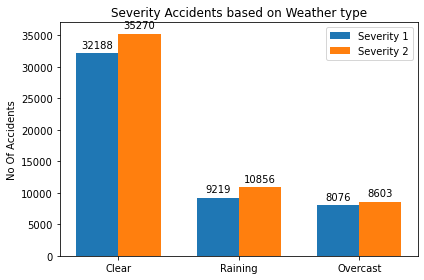

In [33]:
# Create a grouped bar chart to show top 3 weather - severity statistics
weath = ['Clear', 'Raining', 'Overcast']
#Sev1 =[32440,9451,8212]
#Sev2=[35808,11168,8739]
Sev1 = dfwet.loc[2, "SEV1"], dfwet.loc[7, "SEV1"],dfwet.loc[5, "SEV1"]
Sev2 = dfwet.loc[2, "SEV2"], dfwet.loc[7, "SEV2"],dfwet.loc[5, "SEV2"]

x = np.arange(len(weath))  # the weather locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Sev1, width, label='Severity 1')
rects2 = ax.bar(x + width/2, Sev2, width, label='Severity 2')

# Add some text for weather, title and custom x-axis tick labels, etc.
ax.set_ylabel('No Of Accidents')
ax.set_title('Severity Accidents based on Weather type')
ax.set_xticks(x)
ax.set_xticklabels(weath)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()



From the above chart we understand that, from various weather conditions reported, most of the accidents happen during clear weather and severity 2 accidents happen more that severity 1 which means that its more of accidents with injuries than property damage.

##### Plotting a bar chart to show the Severity accidents based on Road conditions

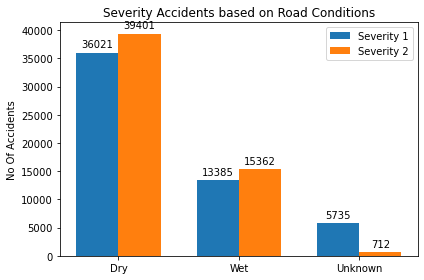

In [34]:
# Create a grouped bar chart to show top 3 road condition - severity statistics

road = ['Dry', 'Wet', 'Unknown']

Sev1 = dfrod.loc[1, "SEV1"], dfrod.loc[8, "SEV1"],dfrod.loc[0, "SEV1"]
Sev2 = dfrod.loc[1, "SEV2"], dfrod.loc[8, "SEV2"],dfrod.loc[0, "SEV2"]

x = np.arange(len(road))  # the weather locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Sev1, width, label='Severity 1')
rects2 = ax.bar(x + width/2, Sev2, width, label='Severity 2')

# Add some text for weather, title and custom x-axis tick labels, etc.
ax.set_ylabel('No Of Accidents')
ax.set_title('Severity Accidents based on Road Conditions')
ax.set_xticks(x)
ax.set_xticklabels(road)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()



From the above chart we understand that, from various road conditions reported, most of the accidents happen during dry road conditions and severity 2 accidents happen more that severity 1 which means that its more of accidents with injuries than property damage.

##### Plotting a bar chart to show the Severity accidents based on Light conditions

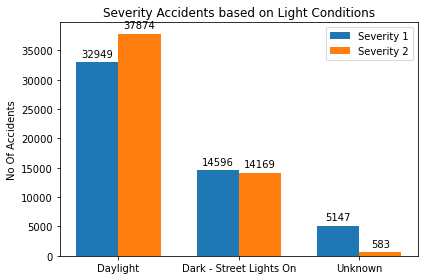

In [35]:
# Create a grouped bar chart to show top 3 light condition - severity statistics

light = ['Daylight', 'Dark - Street Lights On', 'Unknown']

Sev1 = dflgt.loc[6, "SEV1"], dflgt.loc[3, "SEV1"],dflgt.loc[0, "SEV1"]
Sev2 = dflgt.loc[6, "SEV2"], dflgt.loc[3, "SEV2"],dflgt.loc[0, "SEV2"]

x = np.arange(len(light))  # the weather locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Sev1, width, label='Severity 1')
rects2 = ax.bar(x + width/2, Sev2, width, label='Severity 2')

# Add some text for weather, title and custom x-axis tick labels, etc.
ax.set_ylabel('No Of Accidents')
ax.set_title('Severity Accidents based on Light Conditions')
ax.set_xticks(x)
ax.set_xticklabels(light)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


From the above chart we understand that, from various light conditions reported, most of the accidents happen during day light road conditions and severity 2 accidents happen more that severity 1 which means that its more of accidents with injuries than property damage.

##### From sampled dataframe analyse accidents with type of collision

In [36]:
# Print the collision type count to identify the top collosion types
df_wbar=pd.DataFrame(df_sampled['COLLISIONTYPE'].value_counts().rename_axis('COLTYPE').reset_index(name='Counts'))
df_wbar
#type(df_wbar)

,COLTYPE,Counts
0,Angles,22622
1,Rear Ended,22274
2,Parked Car,21758
3,Other,12984
4,Sideswipe,9219
5,Left Turn,9028
6,Pedestrian,6168
7,Cycles,5009
8,Right Turn,1573
9,Head On,1374


##### Plot the data extracted to a bar chart

Text(0.5, 1.0, 'Collision Type Statistics')

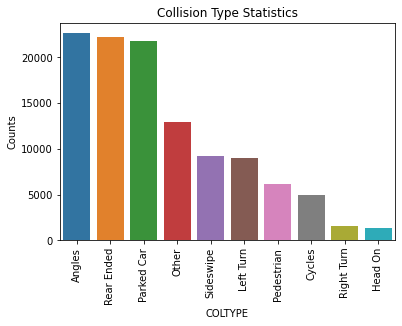

In [37]:
# View the collossion type rating in bar chart
#df_sampled['COLLISIONTYPE'].value_counts().plot(kind='bar', title = 'Collision Type Statistics')
barchart=sns.barplot(x='COLTYPE', y='Counts', data=df_wbar)
barchart.set_xticklabels(barchart.get_xticklabels(),rotation=90) # add to x-label to the plot
barchart.set_title('Collision Type Statistics') # add title to the plot

Above graph shows that the highest number of accidents happen at road Angles followed by Rear Ended and Parked Car

##### Analyse the number of accidents based on address type

In [38]:
# Print the Address Type count of accidents
#df_sampled['ADDRTYPE'].value_counts()
df_abar=pd.DataFrame(df_sampled['ADDRTYPE'].value_counts().rename_axis('ADDTYPE').reset_index(name='Counts'))
df_abar

,ADDTYPE,Counts
0,Block,69100
1,Intersection,42926


Text(0.5, 1.0, 'Address Type Statistics')

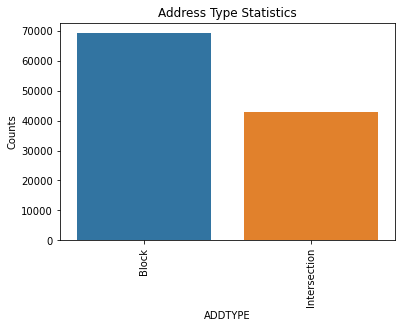

In [39]:
# View the address type rating in bar chart
#df_sampled['ADDRTYPE'].value_counts().plot(kind='bar',  title = 'Address Type Statistics')
barchart=sns.barplot(x='ADDTYPE', y='Counts', data=df_abar)
barchart.set_xticklabels(barchart.get_xticklabels(),rotation=90) # add to x-label to the plot
barchart.set_title('Address Type Statistics') # add title to the plot

Above graph shows that the accidents happen more at Block address type.

##### Create a data frame with Collision type as Head On which can be used for generating a folium map

In [40]:
#new dataframe to plot the lat & lon on map using folium with the based on attribute CollisionType - "Head On"
dflatlon=df_sampled[(df_sampled['COLLISIONTYPE'] == 'Head On')]
dflatlon

,SEVERITYCODE,LAT,LON,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
190874,1,-122.329744,47.603464,Block,Head On,2,1,6,0
122767,1,-122.305681,47.559642,Block,Head On,2,1,6,0
189364,1,-122.298263,47.577527,Intersection,Head On,2,1,6,0
56819,1,-122.271247,47.540250,Block,Head On,5,6,6,0
54591,1,-122.341204,47.609696,Block,Head On,2,1,6,0
...,...,...,...,...,...,...,...,...,...
194064,2,-122.310520,47.548482,Block,Head On,7,8,3,0
194116,2,-122.332030,47.690500,Block,Head On,7,8,3,1
194130,2,-122.376177,47.644770,Intersection,Head On,7,8,3,0
194633,2,-122.345070,47.731674,Block,Head On,2,1,3,0


Above data frame has Lat and Lon of accident locations where head on collisions have happened. 
We can use this data to plot the map to identify the locations based on severity type.

#### Superimposing the locations in the Map using Folium

In [41]:
# using folium map to plot the lat & lon from dataframe and differentiate the circle with color yellow and red (sev 1 & 2)
m = folium.Map(location=[47.6, -122.3], zoom_start=11)

area = folium.map.FeatureGroup()
label=[]

for sev, lat, lng in zip(dflatlon.SEVERITYCODE, dflatlon.LON, dflatlon.LAT,) :
    
    if((sev)==1) :
        area.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=5,
                fill=True,
                color='yellow',
                fill_color='yellow',
                fill_opacity=0.6
                )
        )
    else :
        area.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=5,
                fill=True,
                color='red',
                fill_color='red',
                fill_opacity=0.6
                )
        )
        

In [42]:
# add folium marker with pop up to show the address type, weather, roadcondition and
#speeding info at respective marker location

for i in range(0,len(dflatlon)):
    folium.Marker([dflatlon.iloc[i]['LON'], dflatlon.iloc[i]['LAT']], 
                  popup=dflatlon.iloc[i]['ADDRTYPE']+',  Weather='+dflatlon.iloc[i]['WEATHER'].astype(str)+
                  ', RoadCondition='+dflatlon.iloc[i]['ROADCOND'].astype(str)+', Speeding='+
                  dflatlon.iloc[i]['SPEEDING'].astype(str)).add_to(m)

In [43]:
m.add_child(area)

View the accident locations in Seattle City. Locations marked in yellow circle denotes Severity 1 and red circle denotes  severity 2. Click on the popup  to view the Address type, Weather, Road condition and speeding status at the location. Zoom in to the map to see the roads to see where more accidents happen.

##### Create a dataframe to view the top 10 accident locations

In [44]:
# Top 10 accident location
dfloc=pd.DataFrame(df['LOCATION'].value_counts().rename_axis('LOCATION').reset_index(name='Counts'))
dfloc.head(10)

,LOCATION,Counts
0,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,276
1,BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...,271
2,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,265
3,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,254
4,6TH AVE AND JAMES ST,252
5,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,239
6,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,238
7,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,231
8,WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON...,212
9,ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND...,212


##### View this data on bar chart

Text(0.5, 1.0, 'Top 10 Accident Locations')

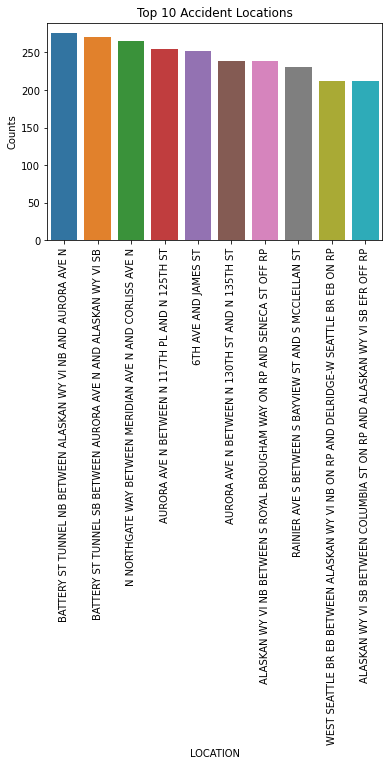

In [45]:
#dfloc.head(10).plot(kind='bar', title = 'Top 10 Accident Location')
barchart=sns.barplot(x='LOCATION', y='Counts', data=dfloc.head(10))
barchart.set_xticklabels(barchart.get_xticklabels(),rotation=90) # add to x-label to the plot
barchart.set_title('Top 10 Accident Locations') # add title to the plot

### 3.3 Model Development

**3.3.1 Initialisation**

**a. Define X and Y**

In [46]:
X=np.asarray(df_sampled[['WEATHER','ROADCOND','LIGHTCOND','SPEEDING']])
X[0:5]

array([[5, 1, 6, 0],
       [2, 1, 6, 0],
       [5, 8, 6, 0],
       [7, 8, 3, 0],
       [2, 1, 6, 0]])

In [47]:
y=np.asarray(df_sampled['SEVERITYCODE'])
y[0:5]

array([1, 1, 1, 1, 1])

**b. Normalise the Data Set**

In [48]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.79696949, -0.57203105,  0.62221169, -0.23039919],
       [-0.58634316, -0.57203105,  0.62221169, -0.23039919],
       [ 0.79696949,  1.68308522,  0.62221169, -0.23039919],
       [ 1.71917793,  1.68308522, -1.04627678, -0.23039919],
       [-0.58634316, -0.57203105,  0.62221169, -0.23039919]])

**c. Train/Test Split**

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (78418, 4) (78418,)
Test set: (33608, 4) (33608,)


**3.3.2 Modeling & Predictions**

**a.	K-Nearest Neighbor (KNN)**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 25
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
kyhat = neigh.predict(X_train)
kyhat[0:5]

array([1, 2, 1, 1, 1])

In [51]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kyhat))
#print("Test set Accuracy: ", metrics.accuracy_score(y_test, kyhat))

Train set Accuracy:  0.5259889311127547


**Calculate the accuracy of KNN for different Ks**

In [52]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    kyhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, kyhat)

    
    std_acc[n-1]=np.std(kyhat==y_test)/np.sqrt(kyhat.shape[0])

mean_acc

array([0.54894668, 0.54490002, 0.54870864, 0.54171626, 0.54787551,
       0.54674482, 0.54716139, 0.51532373, 0.54870864, 0.55186265,
       0.55406451, 0.52014401, 0.51892407, 0.51306237, 0.52082837,
       0.5111283 , 0.51868603, 0.51704951, 0.51776363, 0.51529398,
       0.51826946, 0.5182397 , 0.51901333, 0.5179124 , 0.51844799,
       0.51785289, 0.51880505, 0.51794216, 0.52407165])

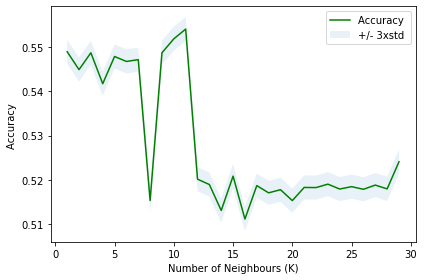

In [53]:
#import matplotlib.pyplot as plt

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [54]:
print("Best accuracy =", mean_acc.max(),"k=", mean_acc.argmax()+1 )

Best accuracy = 0.5540645084503689 k= 11


In [55]:
k = 11
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
kyhat = neigh.predict(X_test)
kyhat[0:5]

array([2, 2, 2, 2, 1])

**b. Decision Tree**

In [56]:
from sklearn.tree import DecisionTreeClassifier

#Building the decision tree
dtree=DecisionTreeClassifier(criterion="entropy", max_depth=7)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
#Train Model & Predict
dtyhat=dtree.predict(X_test)
dtyhat[0:5]

array([2, 2, 2, 2, 1])

**c. Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
LRyhat = LR.predict(X_test)
LRyhat

LRyhat_prob = LR.predict_proba(X_test)
LRyhat_prob

array([[0.47702251, 0.52297749],
       [0.47702251, 0.52297749],
       [0.47702251, 0.52297749],
       ...,
       [0.53045002, 0.46954998],
       [0.47702251, 0.52297749],
       [0.40193133, 0.59806867]])

# 4. Results and Evaluation

In [60]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [61]:
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, kyhat))
print("KNN F1-score: %.2f" % f1_score(y_test, kyhat, average='weighted') )

KNN Jaccard index: 0.55
KNN F1-score: 0.54


In [62]:
print("Decision Tree Jaccard index: %.2f" % jaccard_similarity_score(y_test, dtyhat))
print("Decision Tree F1-score: %.2f" % f1_score(y_test, dtyhat, average='weighted') )

Decision Tree Jaccard index: 0.56
Decision Tree F1-score: 0.53


In [63]:
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LRyhat))
print("LR F1-score: %.2f" % f1_score(y_test, LRyhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LRyhat_prob))

LR Jaccard index: 0.55
LR F1-score: 0.53
LR LogLoss: 0.68


## REPORT

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.55    | 0.54     | NA      |
| Decision Tree      | 0.56    | 0.53     | NA      |
| LogisticRegression | 0.55    | 0.53     |0.68     |

# Conclusion